#### **Introducción**: Se estima que los programas de gobiernmo de un país tienen alguna relación con los programas de gobierno de otros países que los antecedieron. Por ejemplo, Nueva Zelanda abordó el aspecto de 'Pueblos Originarios' con anterioridad a Chile de una manera considerada 'exitosa'. En Chile este aspecto ha permeado en los programas de Gobierno con fuerza desde 1989(*) en adelante; entonces es esperable que los programas de gobierno de Chile en lo relacionado con 'Pueblos Originarios' hayan sido incorporados en los programas de gobierno influidos por la experiencia de Nueva Zelanda.

* Utilizando el dataset de Manifesto Project buscaremos la existencia de correlaciones entre programas de gobierno, ya sea a nivel de todo el programa como también a nivel de ciertos aspectos específicos y dominios.
* Dominios:
*           * Relaciones internacionales
*           * Libertad y Democracia
*           * Sistema Político
*           * Economía
*           * Bienestar y Calidad de Vida
*           * Tejido Social
*           * Grupos Sociales

* Aspecto específicos:
       
*          * Inclusión y Minorías
*          * Orden y Corrupción
*          * Medio Ambiente y Sostenibilidad
*          * Pueblos Originarios
*          * Derechos Humanos
*          * Inmigración
*          * Moral Tradicional 


Pre proceso de la información:
* El dataset contiene información de 67 países entre 1920 y 2023.
* Los primeros 2 países fueron Estados Unidos y Canadá en 1920; luego se fueron incorporando el resto según se muestra en el siguiente cuadro:

<img src="../assets/Paises_por_año.png" alt="" width="550">

* **Consideraciones:**

*   * El país central en el análisis será Chile
*   * **En una primera aproximación se considerarán todas las variables disponibles para ver la existencia de relaciones entre programas de gobierno. Posteriormente se analizarán aspectos en particular.**
*   * Para homogeneizar el dataset, no introducir sesgo y dar cuenta de que no se dispone de información de todos los países todos los años, se agregó registros "cero" a cada país para los años previos a su incorporación al dataset.
*   * Dado que los países realizan sus elecciones en diferentes años, se realizará el análisis a nivel de períodos de 5 años (21 períodos de 5 años en total)
*   * Para cada país, para cada año de elección, se consolidará la información en base al promedio ponderado de las variables de interés, usando como peso para la ponderación el porcentaje de votos que obtuvo cada candidato o coalición. De esta manera tendremos un dataset 'ponderado'  en el cual cada país tiene un registro para cada año de elección. Este registro representa una aproximación 'al sentir nacional' reflejado en los programas de gobierno. 
*   * Se eliminó 107 registros de países con algún valor 'NaN' o 'Missing value'
* **Correlaciones**
*   * Se utilizó la correlación de Pearson
*   * Se consideró que un programa presidencial puede estar relacionado con los programas presidenciales que existián previos a él, y no los posteriores
*   * En primera instancia se correlacionaron todas los programas políticos del dataset ponderado, con los programas de Chile
*   * Se construye un heat map prelimimar
*
<img src="../assets/Heatmap_preliminar.png" alt="" width="750">
*

* **Red de Similaridad**
*   * Se construyó una red de similaridad donde los nodos son los programas de gobierno de cada países en cada período de 5 años, y donde los enlaces son la correlación entre un programa y los programas de Chile. Se utilizó la libraría NetworkX
*   * Los enlaces tienen un color más fuerte si es que la correlación es mayor
* **Clusters**
* * Se utilizó el algoritmo community_louvain para detectar clusters de países donde la correlación es más fuerte, según un umbral (threshold) determiando (85%)
*   * Se identifican 5 clusters preliminares/ **OBSERVACIÓN:** Sólo se ve correlaciones con programas de gobierno del mismo período.
* 
<img src="../assets/Clusters_preliminar.png" alt="" width="550">
*

*   * Medidas de centralidad



### Código

#### Librerías

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from networkx.algorithms import community
import community as community_louvain


#### Cargar el dataset de Manifesto Project al dataframe 'df'

In [102]:
file_path = "data/MPDataset_MPDS2024a.csv"
df = pd.read_csv(file_path, na_values=['', 'NaN', 'N/A', None]).fillna(0)


/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_14950/455353348.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, na_values=['', 'NaN', 'N/A', None]).fillna(0)


In [103]:
df

,country,countryname,oecdmember,eumember,edate,date,party,partyname,partyabbrev,parfam,...,per608_3,per703_1,per703_2,rile,planeco,markeco,welfare,intpeace,datasetversion,id_perm
0,11,Sweden,0,0,17/09/1944,194409,11220,Communist Party of Sweden,SKP,20,...,0.0,0.000,0.0,9.600,1.900,1.900,0.000,1.900,2024a,JN1LZH
1,11,Sweden,0,0,17/09/1944,194409,11320,Social Democratic Labour Party,SAP,30,...,0.0,0.000,0.0,-37.800,3.300,2.200,33.400,5.600,2024a,CMR7F6
2,11,Sweden,0,0,17/09/1944,194409,11420,People’s Party,FP,40,...,0.0,0.000,0.0,9.500,3.200,6.400,14.300,1.600,2024a,Z6OL6C
3,11,Sweden,0,0,17/09/1944,194409,11620,Right Party,0,60,...,0.0,0.000,0.0,28.000,1.800,22.800,10.600,0.000,2024a,YMKVN2
4,11,Sweden,0,0,17/09/1944,194409,11810,Agrarian Party,0,80,...,0.0,0.000,0.0,23.810,0.000,19.048,0.000,4.762,2024a,U4SCRD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5146,181,South Africa,0,0,08/05/2019,201905,181510,African Christian Democratic Party,ACDP,50,...,0.0,5.000,0.0,12.500,0.833,7.500,14.167,0.000,2024a,HSQT6Y
5147,181,South Africa,0,0,08/05/2019,201905,181520,African Transformation Movement,ATM,50,...,0.0,1.042,0.0,-6.771,3.385,1.042,22.135,1.562,2024a,B6QCSE
5148,181,South Africa,0,0,08/05/2019,201905,181710,Freedom Front Plus,FF+,70,...,0.0,3.497,0.0,19.580,0.699,10.664,11.364,0.000,2024a,OS725O
5149,181,South Africa,0,0,08/05/2019,201905,181910,Inkatha Freedom Party,IFP,90,...,0.0,3.289,0.0,-6.579,0.658,0.658,28.947,0.000,2024a,XKM7J7


#### Crear campo 'agno' para registrar el año del programa de gobierno

In [104]:
# Insert column 'agno' into the dataframe, of type int, to the right of column 'date'
df.insert(df.columns.get_loc('date') + 1, 'agno', df['edate'].str[-4:].astype(int))

# List unique values of new column 'agno'
unique_agno_values = df['agno'].unique()
# print(unique_agno_values)

In [105]:
df.head()

,country,countryname,oecdmember,eumember,edate,date,agno,party,partyname,partyabbrev,...,per608_3,per703_1,per703_2,rile,planeco,markeco,welfare,intpeace,datasetversion,id_perm
0,11,Sweden,0,0,17/09/1944,194409,1944,11220,Communist Party of Sweden,SKP,...,0.0,0.0,0.0,9.60,1.9,1.900,0.0,1.900,2024a,JN1LZH
1,11,Sweden,0,0,17/09/1944,194409,1944,11320,Social Democratic Labour Party,SAP,...,0.0,0.0,0.0,-37.80,3.3,2.200,33.4,5.600,2024a,CMR7F6
2,11,Sweden,0,0,17/09/1944,194409,1944,11420,People’s Party,FP,...,0.0,0.0,0.0,9.50,3.2,6.400,14.3,1.600,2024a,Z6OL6C
3,11,Sweden,0,0,17/09/1944,194409,1944,11620,Right Party,0,...,0.0,0.0,0.0,28.00,1.8,22.800,10.6,0.000,2024a,YMKVN2
4,11,Sweden,0,0,17/09/1944,194409,1944,11810,Agrarian Party,0,...,0.0,0.0,0.0,23.81,0.0,19.048,0.0,4.762,2024a,U4SCRD


In [106]:
unique_country_count = df['countryname'].nunique()
print(f"Number of unique countries: {unique_country_count}")

Number of unique countries: 67


#### Año de incorporación de los países al Manifesto Project

In [107]:
# Create a new dataframe 'df_in_mp' with columns 'agno_mp' and 'countryname'
df_in_mp = df.groupby('countryname')['date'].min().reset_index()

# Rename the 'date' column to 'agno_mp'
df_in_mp.rename(columns={'date': 'agno_mp'}, inplace=True)

df_in_mp_sorted = df_in_mp.sort_values(by='agno_mp', ascending=True)
# Add column 'agno_in' to 'df_in_mp_sorted' by taking the integer part of 'agno_mp' divided by 100
df_in_mp_sorted['agno_in'] = df_in_mp_sorted['agno_mp'] // 100


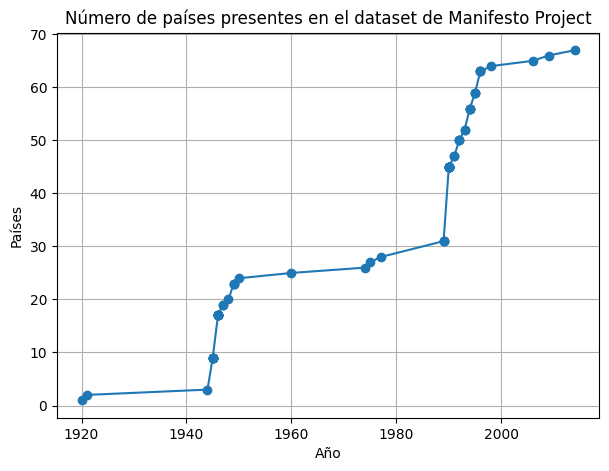

In [108]:
import matplotlib.pyplot as plt

# Create a new DataFrame to store the cumulative counts
cumulative_counts = df_in_mp_sorted.copy()

# Calculate the cumulative count of countries for each 'agno_in'
cumulative_counts['cumulative_count'] = cumulative_counts['agno_in'].rank(method='max').astype(int)

# Plot the cumulative counts
plt.figure(figsize=(7, 5))
plt.plot(cumulative_counts['agno_in'], cumulative_counts['cumulative_count'], marker='o')
plt.xlabel('Año')
plt.ylabel('Países')
plt.title('Número de países presentes en el dataset de Manifesto Project')
plt.grid(True)
plt.show()

In [109]:
# cargar Analytical_Data
df_AD = pd.read_excel('data/Analytical_Data.xlsx')
df_AD.head()


,Dominio,Nombre_Dominio,Variable_per,Detalle_Dominio
0,Domain_1,External Relations,per101,Foreign Special Relationships: Positive
1,Domain_1,External Relations,per102,Foreign Special Relationships: Negative
2,Domain_1,External Relations,per103,Anti-Imperialism
3,Domain_1,External Relations,per104,Military: Positive
4,Domain_1,External Relations,per105,Military: Negative


#### Agrupamos los países a 1 registro por año, sumando las variables 'perxxx'

##### Agregamos la columna 'ventana_5' para agrupar las elecciones en períodos de 5 años entre 1920 y 2023
* Período 5 años : 1920, 1925, 1930, ... 2000, 2005, 2010, 2015, 2020, 2025

In [110]:
# cargar períodos
df_ventana_10 = pd.read_excel('data/Ventana_10.xlsx')
df_ventana_5 = pd.read_excel('data/Ventana_5.xlsx')

In [111]:
# en 'df' Insertamos columnas 'ventana_10' y 'ventana_5'
df = df.merge(df_ventana_10, on='agno', how='left').rename(columns={'ventana': 'ventana_10'})
df = df.merge(df_ventana_5, on='agno', how='left').rename(columns={'ventana': 'ventana_5'})

# Get the position of the 'agno' column
agno_index = df.columns.get_loc('agno')

# Move 'ventana_10' and 'ventana_5' to the right of 'agno'
columns = list(df.columns)
columns.insert(agno_index + 1, columns.pop(columns.index('ventana_10')))
columns.insert(agno_index + 2, columns.pop(columns.index('ventana_5')))
df = df[columns]

In [112]:
df

,country,countryname,oecdmember,eumember,edate,date,agno,ventana_10,ventana_5,party,...,per608_3,per703_1,per703_2,rile,planeco,markeco,welfare,intpeace,datasetversion,id_perm
0,11,Sweden,0,0,17/09/1944,194409,1944,140,5,11220,...,0.0,0.000,0.0,9.600,1.900,1.900,0.000,1.900,2024a,JN1LZH
1,11,Sweden,0,0,17/09/1944,194409,1944,140,5,11320,...,0.0,0.000,0.0,-37.800,3.300,2.200,33.400,5.600,2024a,CMR7F6
2,11,Sweden,0,0,17/09/1944,194409,1944,140,5,11420,...,0.0,0.000,0.0,9.500,3.200,6.400,14.300,1.600,2024a,Z6OL6C
3,11,Sweden,0,0,17/09/1944,194409,1944,140,5,11620,...,0.0,0.000,0.0,28.000,1.800,22.800,10.600,0.000,2024a,YMKVN2
4,11,Sweden,0,0,17/09/1944,194409,1944,140,5,11810,...,0.0,0.000,0.0,23.810,0.000,19.048,0.000,4.762,2024a,U4SCRD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5146,181,South Africa,0,0,08/05/2019,201905,2019,210,20,181510,...,0.0,5.000,0.0,12.500,0.833,7.500,14.167,0.000,2024a,HSQT6Y
5147,181,South Africa,0,0,08/05/2019,201905,2019,210,20,181520,...,0.0,1.042,0.0,-6.771,3.385,1.042,22.135,1.562,2024a,B6QCSE
5148,181,South Africa,0,0,08/05/2019,201905,2019,210,20,181710,...,0.0,3.497,0.0,19.580,0.699,10.664,11.364,0.000,2024a,OS725O
5149,181,South Africa,0,0,08/05/2019,201905,2019,210,20,181910,...,0.0,3.289,0.0,-6.579,0.658,0.658,28.947,0.000,2024a,XKM7J7


In [113]:
print(df.shape)
num_filas_nan = df.isna().any(axis=1).sum()
print(num_filas_nan)

(5151, 178)
0


#### Hagamos la ponderación por año por país
#### debemos elegir entre 'pervote' o 'presvote' para ponderar. Si existe 'presvote' usamos ese si no, 'pervote'
#### Ponderemos

In [114]:
# Identificar las columnas que contienen los porcentajes
lista_columnas = [col for col in df.columns if col.startswith('per') and (col[4].isdigit() or col[4] == '_')]

# Función para calcular el promedio ponderado con base en presvote o pervote
def calcular_promedio_ponderado(grupo):
    # Si presvote contiene solo ceros o valores nulos, se usará pervote
    if (grupo['presvote'].fillna(0) == 0).all():
        peso = grupo['pervote']
        tipovoto = 'pervote'
    else:
        peso = grupo['presvote']
        tipovoto = 'presvote'

    # Si ambas están en cero o vacías
    if peso.isna().all() or (peso == 0).all():
        tipovoto = 'no hay pervote ni presvote'
        peso = pd.Series(np.ones(len(grupo)))  # usar peso 1 para calcular el promedio simple

    # Calcular el promedio ponderado para cada columna de 'lista_columnas'
    ponderado = {}
    for col in lista_columnas:
        ponderado[col] = np.average(grupo[col], weights=peso)

    # Devolver un nuevo registro con los datos
    return pd.Series(
        [grupo['agno'].iloc[0], grupo['countryname'].iloc[0], grupo['ventana_10'].iloc[0], 
         grupo['ventana_5'].iloc[0], tipovoto] + list(ponderado.values()),
        index=['agno', 'countryname', 'ventana_10', 'ventana_5', 'tipovoto'] + lista_columnas
    )

# Agrupar por countryname y agno, y aplicar la función de promedio ponderado
df_ponderado = df.groupby(['countryname', 'agno']).apply(calcular_promedio_ponderado).reset_index(drop=True)


In [115]:
df_ponderado

,agno,countryname,ventana_10,ventana_5,tipovoto,per101,per102,per103,per104,per105,...,per606_1,per606_2,per607_1,per607_2,per607_3,per608_1,per608_2,per608_3,per703_1,per703_2
0,1991,Albania,190,15,pervote,2.140848,0.000000,1.559835,0.581013,0.193536,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1,1992,Albania,190,15,pervote,0.972966,0.000000,0.000000,1.465758,0.137749,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2,1996,Albania,190,16,pervote,1.945808,0.000000,0.020491,0.472585,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
3,1997,Albania,190,16,pervote,1.770988,0.000000,0.031388,3.046506,0.015910,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
4,2001,Albania,200,17,pervote,2.392570,0.000000,0.000000,2.757403,0.026619,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,2008,United States,200,18,pervote,1.978711,0.088485,0.044020,5.839310,0.088485,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
842,2012,United States,210,19,presvote,0.505120,0.161887,0.189797,7.527242,1.491961,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
843,2016,United States,210,20,presvote,0.866280,0.111349,0.000000,5.807609,0.763045,...,0.803674,0.088884,0.160093,0.263441,1.787391,0.022465,0.078721,0.0,1.657539,0.022465
844,2020,United States,220,21,presvote,1.190682,0.129249,0.161450,5.565559,1.951804,...,0.449422,0.086907,0.547069,0.082574,1.909957,0.021965,0.043453,0.0,1.991430,0.021965


#### Ordenemos el dataset según períodos de 5 años. Para  cada país, se sumarán los valores de las variables de aquellos años dengtro del período


In [116]:
# Cambiemos el nombre a 'df_f
df_f = df_ponderado.copy()


In [117]:
df_f.shape

(846, 147)

#### df_5: Consolidamos por país y por 'ventana_5'

In [118]:
# Crear el dataframe 'df_5' sumando los valores de las columnas que comienzan con 'per' agrupados por 'countryname' y 'ventana_5'
df_5 = df_f.groupby(['countryname', 'ventana_5'])[lista_columnas].sum().reset_index()

# Mostrar las primeras filas del nuevo dataframe 'df_5'
df_5


,countryname,ventana_5,per101,per102,per103,per104,per105,per106,per107,per108,...,per606_1,per606_2,per607_1,per607_2,per607_3,per608_1,per608_2,per608_3,per703_1,per703_2
0,Albania,15,3.113815,0.000000,1.559835,2.046771,0.331285,1.674371,4.632186,5.169904,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1,Albania,16,3.716797,0.000000,0.051879,3.519091,0.015910,0.579077,4.971347,1.981720,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2,Albania,17,2.392570,0.000000,0.000000,2.757403,0.026619,0.023948,3.523162,1.452779,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
3,Argentina,14,0.000000,0.000000,4.619213,0.448618,0.828036,0.338070,2.955090,0.000000,...,7.595332,0.000000,0.326532,0.000000,0.000000,0.000000,0.000000,0.0,2.495280,0.000000
4,Argentina,16,0.254185,0.020140,0.725611,1.406834,0.100835,1.720736,5.478894,3.932102,...,4.494125,0.000000,0.443809,0.000000,0.809128,0.000000,0.000000,0.0,2.573783,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,United States,18,1.978711,0.088485,0.044020,5.839310,0.088485,1.308294,8.863648,0.343947,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
600,United States,19,0.505120,0.161887,0.189797,7.527242,1.491961,0.658037,6.073936,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
601,United States,20,0.866280,0.111349,0.000000,5.807609,0.763045,0.635581,4.669601,0.000000,...,0.803674,0.088884,0.160093,0.263441,1.787391,0.022465,0.078721,0.0,1.657539,0.022465
602,United States,21,1.190682,0.129249,0.161450,5.565559,1.951804,0.480557,3.907785,0.020377,...,0.449422,0.086907,0.547069,0.082574,1.909957,0.021965,0.043453,0.0,1.991430,0.021965


In [119]:
df_5.shape

(604, 144)

In [120]:
all_per_variables = [col for col in df_5.columns if col.startswith('per')]
all_per_variables

['per101',
 'per102',
 'per103',
 'per104',
 'per105',
 'per106',
 'per107',
 'per108',
 'per109',
 'per110',
 'per201',
 'per202',
 'per203',
 'per204',
 'per301',
 'per302',
 'per303',
 'per304',
 'per305',
 'per401',
 'per402',
 'per403',
 'per404',
 'per405',
 'per406',
 'per407',
 'per408',
 'per409',
 'per410',
 'per411',
 'per412',
 'per413',
 'per414',
 'per415',
 'per416',
 'per501',
 'per502',
 'per503',
 'per504',
 'per505',
 'per506',
 'per507',
 'per601',
 'per602',
 'per603',
 'per604',
 'per605',
 'per606',
 'per607',
 'per608',
 'per701',
 'per702',
 'per703',
 'per704',
 'per705',
 'per706',
 'per1011',
 'per1012',
 'per1013',
 'per1014',
 'per1015',
 'per1016',
 'per1021',
 'per1022',
 'per1023',
 'per1024',
 'per1025',
 'per1026',
 'per1031',
 'per1032',
 'per1033',
 'per2021',
 'per2022',
 'per2023',
 'per2031',
 'per2032',
 'per2033',
 'per2041',
 'per3011',
 'per3051',
 'per3052',
 'per3053',
 'per3054',
 'per3055',
 'per4011',
 'per4012',
 'per4013',
 'per4014',


#### df_5_extended: Agreguemos registros cero para Chile para los períodos en que no hay información. Esto da consistencia en la comparación, se refleja que para ciertos períodos no hay datos lo que evita sesgo en la comparación, y mantiene la uniformidad en la red de similaridad

In [121]:
# Paso 1: Obtener la lista de todos los países en el dataframe
all_countries = df_5['countryname'].unique()

# Paso 2: Crear un DataFrame con todos los períodos posibles (1 al 21)
all_periods = pd.DataFrame({'ventana_5': list(range(1, 22))})

# Paso 3: Crear un DataFrame vacío para almacenar los registros faltantes
missing_periods_all = pd.DataFrame()

# Paso 4: Iterar sobre todos los países y generar registros con ceros para los períodos faltantes
for country in all_countries:
    # Filtrar los períodos existentes del país en df_5
    existing_periods = df_5[df_5['countryname'] == country]['ventana_5'].unique()
    
    # Determinar los períodos faltantes para el país
    missing_periods = all_periods[~all_periods['ventana_5'].isin(existing_periods)]
    
    # Crear registros con valores cero para los períodos faltantes
    missing_data = pd.DataFrame({
        'countryname': [country] * len(missing_periods),
        'ventana_5': missing_periods['ventana_5']
    })
    
    # Asignar valores cero a todas las variables 'per'
    for col in all_per_variables:
        missing_data[col] = 0.0
    
    # Agregar los registros faltantes al DataFrame total
    missing_periods_all = pd.concat([missing_periods_all, missing_data], ignore_index=True)

# Paso 5: Combinar los registros faltantes con el DataFrame original
df_5_extended = pd.concat([df_5, missing_periods_all], ignore_index=True)

# Paso 6: Verificar que ahora todos los países tengan datos para todos los períodos
df_5_extended.groupby('countryname')['ventana_5'].nunique()


/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_14950/2392521840.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  missing_data[col] = 0.0
/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_14950/2392521840.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  missing_data[col] = 0.0
/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_14950/2392521840.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.

countryname
Albania           21
Argentina         21
Armenia           21
Australia         21
Austria           21
                  ..
Turkey            21
Ukraine           21
United Kingdom    21
United States     21
Uruguay           21
Name: ventana_5, Length: 67, dtype: int64

In [122]:
df_5_extended.shape

(1407, 144)

In [123]:
df_5_extended.head()

,countryname,ventana_5,per101,per102,per103,per104,per105,per106,per107,per108,...,per606_1,per606_2,per607_1,per607_2,per607_3,per608_1,per608_2,per608_3,per703_1,per703_2
0,Albania,15,3.113815,0.00000,1.559835,2.046771,0.331285,1.674371,4.632186,5.169904,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
1,Albania,16,3.716797,0.00000,0.051879,3.519091,0.015910,0.579077,4.971347,1.981720,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
2,Albania,17,2.392570,0.00000,0.000000,2.757403,0.026619,0.023948,3.523162,1.452779,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
3,Argentina,14,0.000000,0.00000,4.619213,0.448618,0.828036,0.338070,2.955090,0.000000,...,7.595332,0.0,0.326532,0.0,0.000000,0.0,0.0,0.0,2.495280,0.0
4,Argentina,16,0.254185,0.02014,0.725611,1.406834,0.100835,1.720736,5.478894,3.932102,...,4.494125,0.0,0.443809,0.0,0.809128,0.0,0.0,0.0,2.573783,0.0


### Correlación de Pearson y Threshold

#### Correlación de Pearson

**Qué es**: La correlación de Pearson mide la relación lineal entre dos conjuntos de datos. En este caso, mediría cómo se correlacionan los porcentajes de las etiquetas temáticas entre dos programas de gobierno.

**Aplicación**: Para cada par de programas de gobierno (por ejemplo, "Chile_1990" y "Alemania_1980"), calcula la correlación de Pearson usando sus respectivos vectores de porcentajes de las 56 etiquetas temáticas.

Si el vector de "Chile_1990" es `[x1,x2,...,x56]` y el de "Alemania_1980" es `[y1,y2,...,y56]`, entonces la correlación de Pearson se calcula como:

$$
r = \frac{\sum_{i=1}^{56} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{56} (x_i - \bar{x})^2} \cdot \sqrt{\sum_{i=1}^{56} (y_i - \bar{y})^2}}
$$

Donde $\bar{x}$ y $\bar{y}$ son las medias de los vectores de porcentajes.

#### Interpretación de la Correlación:
El valor de $r$ está en el rango $[-1,1]$, donde:

- $r = 1$ indica una correlación positiva perfecta (discursos muy similares en la distribución temática).
- $r = -1$ indica una correlación negativa perfecta (discursos temáticamente opuestos).
- $r \approx 0$ indica que no hay una correlación lineal significativa.

#### Uso en la Red de Similaridad:
Usaremos el valor absoluto de la correlación ($|r|$) para ponderar la arista entre dos programas. Valores cercanos a 1 indican una fuerte similaridad temática, mientras que valores cercanos a 0 indican poca o ninguna similaridad.

---


#### 1. TRABAJO CON ASPECTOS PARTICULARES
   * Crearemos una lista de nombres de 'aspectos' junto con una lista de nombres de variables que lo explican
   * Consolidaremos 'df_5_extended' para que incluya solamente las volumnas de interés para cada aspecto.


#### 1.1 Lista de aspectos y variables de interés
* Aspecto específicos:
       
*          * Inclusión y Minorías
*          * Orden y Corrupción
*          * Medio Ambiente y Sostenibilidad
*          * Pueblos Originarios
*          * Derechos Humanos
*          * Inmigración
*          * Moral Tradicional 


In [124]:
# Aspectos y variables de interés
aspectos = ['Inclusion_y_Minorias', 'Orden_y_Corrupcion', 'Medio_Ambiente_y_Sostenibilidad', 'Pueblos_Originarios', 'Derechos_Humanos', 'Inmigracion', 'Moral_Tradicional']
Inclusion_y_Minorias = ['per503', 'per705', 'per201_2']
Orden_y_Corrupcion = ['per605_1', 'per605_2', 'per304']
Medio_Ambiente_y_Sostenibilidad = ['per501', 'per416_2']
Pueblos_Originarios = ['per607_3', 'per608_3']
Derechos_Humanos = ['per201_1', 'per201_2']
Inmigracion = ['per602_2', 'per607_1']
Moral_Tradicional = ['per603', 'per604']


---
#### Threshold
___

In [125]:
threshold = 0.99


Analizando: Inclusion_y_Minorias


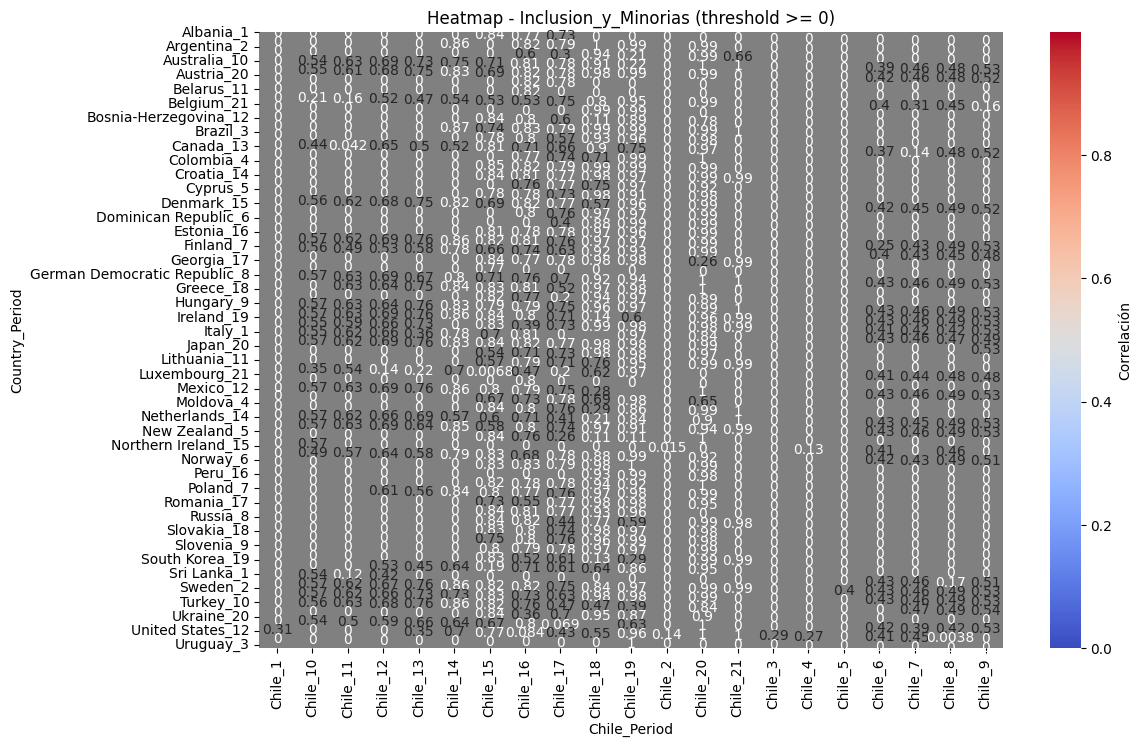

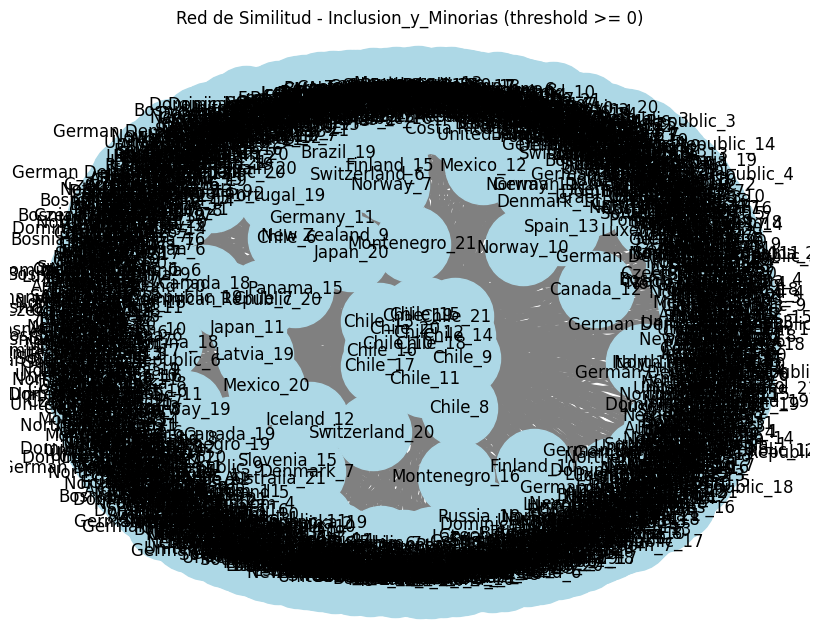

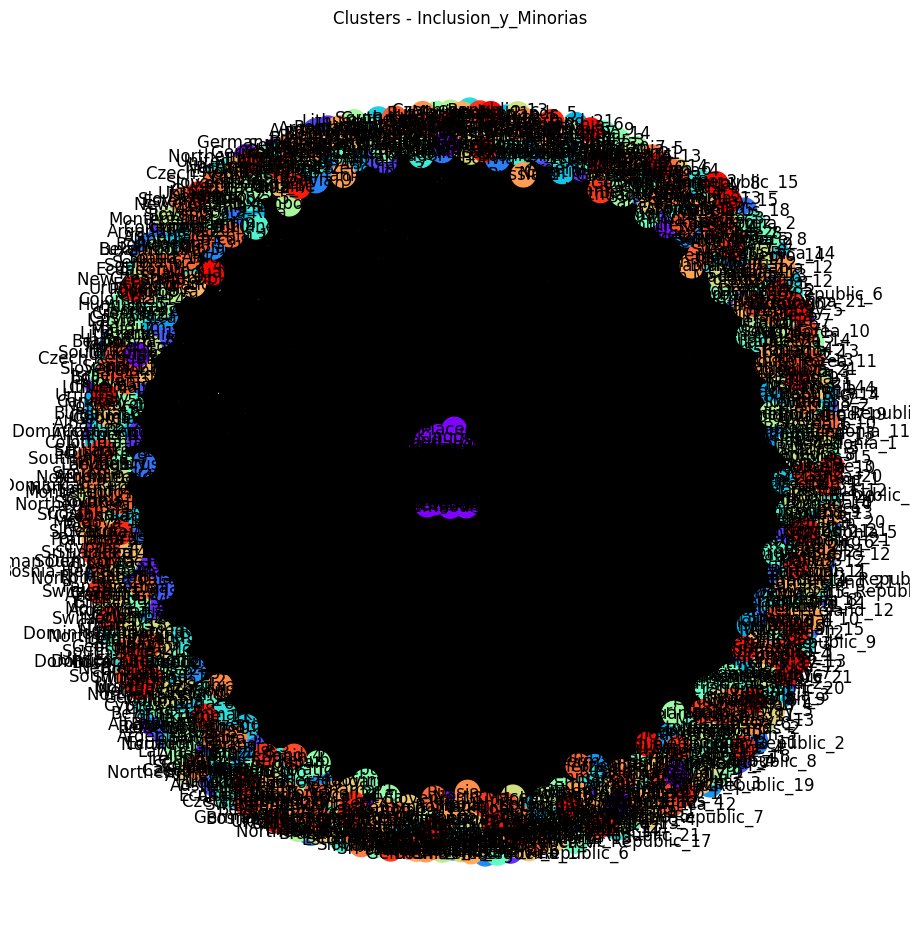

In [ ]:

def calcular_correlaciones(df, variables, threshold):
    """Calcula las correlaciones entre Chile y otros países para un conjunto de variables."""
    df_chile = df[df['countryname'] == 'Chile'].copy()
    df_otros = df[df['countryname'] != 'Chile']

    correlation_results = defaultdict(list)

    for index, row in df_otros.iterrows():
        country_period = row['countryname'] + '_' + str(row['ventana_5'])
        country_data = row[variables].dropna()
        country_data = pd.to_numeric(country_data, errors='coerce')

        chile_periods = df_chile[df_chile['ventana_5'] >= row['ventana_5']]
        for _, chile_row in chile_periods.iterrows():
            chile_period = 'Chile_' + str(chile_row['ventana_5'])
            chile_data = chile_row[variables].dropna()
            chile_data = pd.to_numeric(chile_data, errors='coerce')

            correlation = country_data.corr(chile_data)
            correlation = 0 if pd.isna(correlation) else correlation

            correlation_results[(country_period, chile_period)].append(correlation)

    final_results = {key: np.mean(values) for key, values in correlation_results.items()}

    df_correlations = pd.DataFrame(
        list(final_results.items()), 
        columns=['Country_Period_And_Chile_Period', 'Correlation_with_Chile']
    )
    df_correlations[['Country_Period', 'Chile_Period']] = pd.DataFrame(
        df_correlations['Country_Period_And_Chile_Period'].tolist(), index=df_correlations.index
    )
    df_correlations.drop('Country_Period_And_Chile_Period', axis=1, inplace=True)
    return df_correlations

def generar_heatmap_y_red(df_correlations, aspecto, threshold):
    """Genera un heatmap y una red de similitud."""
    df_filtered = df_correlations[df_correlations['Correlation_with_Chile'] >= threshold].copy()
    df_filtered['Chile_Period'] = df_filtered['Country_Period'].apply(lambda x: 'Chile_' + x.split('_')[1])
    df_filtered = df_filtered.groupby(['Country_Period', 'Chile_Period'], as_index=False).agg({'Correlation_with_Chile': 'mean'})

    heatmap_data = df_filtered.pivot(index='Country_Period', columns='Chile_Period', values='Correlation_with_Chile')

    # Mostrar Heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", linewidths=0.5, linecolor='gray', cbar_kws={'label': 'Correlación'})
    plt.title(f'Heatmap - {aspecto} (threshold >= {threshold})')
    plt.show()

    # Crear la red de similitud
    G = nx.Graph()
    for _, row in df_filtered.iterrows():
        nodo_chile = 'Chile_' + row['Chile_Period'].split('_')[1]
        nodo_pais = row['Country_Period']
        G.add_edge(nodo_chile, nodo_pais, weight=row['Correlation_with_Chile'])

    # Dibujar la red de similitud
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G, k=0.5, seed=42)
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', edge_color='gray', width=2)
    plt.title(f'Red de Similitud - {aspecto} (threshold >= {threshold})')
    plt.show()

def calcular_clusters_y_centralidades(df_correlations, aspecto, threshold):
    """Calcula los clusters y las métricas de centralidad."""
    G = nx.Graph()
    for _, row in df_correlations.iterrows():
        nodo_chile = 'Chile_' + row['Chile_Period'].split('_')[1]
        nodo_pais = row['Country_Period']
        G.add_edge(nodo_chile, nodo_pais, weight=abs(row['Correlation_with_Chile']))

    partition = community_louvain.best_partition(G)

    # Dibujar los clusters
    plt.figure(figsize=(9, 9))
    pos = nx.spring_layout(G, seed=42)
    node_colors = [partition[node] for node in G.nodes()]
    nx.draw(G, pos, node_color=node_colors, cmap=plt.cm.rainbow, with_labels=True)
    plt.title(f'Clusters - {aspecto}')
    plt.show()

    # Calcular las métricas de centralidad
    degree = nx.degree_centrality(G)
    betweenness = nx.betweenness_centrality(G, weight='weight')
    eigenvector = nx.eigenvector_centrality(G, max_iter=1000)

    df_centralities = pd.DataFrame({
        'Nodo': list(degree.keys()),
        'Degree_Centrality': list(degree.values()),
        'Betweenness_Centrality': list(betweenness.values()),
        'Eigenvector_Centrality': list(eigenvector.values())
    })

    print(f"\nMétricas de centralidad para el aspecto {aspecto}:")
    print(df_centralities.head())

    return df_centralities

def ejecutar_analisis_por_aspecto(df, aspectos, threshold):
    """Ejecuta todo el análisis para cada aspecto."""
    for aspecto in aspectos:
        print(f'\nAnalizando: {aspecto}')
        variables = globals()[aspecto]
        df_correlations = calcular_correlaciones(df, variables, threshold)
        generar_heatmap_y_red(df_correlations, aspecto, threshold)
        calcular_clusters_y_centralidades(df_correlations, aspecto, threshold)

# Definir los aspectos y sus variables
aspectos = ['Inclusion_y_Minorias', 'Orden_y_Corrupcion', 'Medio_Ambiente_y_Sostenibilidad']
Inclusion_y_Minorias = ['per503', 'per705', 'per201_2']
Orden_y_Corrupcion = ['per605_1', 'per605_2', 'per304']
Medio_Ambiente_y_Sostenibilidad = ['per501', 'per416_2']

# Ejecutar el análisis
ejecutar_analisis_por_aspecto(df_5_extended, aspectos, threshold=0)


In [95]:
df_correlaciones_totales

,Correlation_with_Chile,Country_Period,Chile_Period
0,0.988443,Albania_15,Chile_15
1,0.977765,Albania_15,Chile_16
2,0.989368,Albania_15,Chile_18
3,0.949315,Albania_15,Chile_19
4,0.994753,Albania_15,Chile_20
...,...,...,...
45733,0.000000,Uruguay_18,Chile_20
45734,0.000000,Uruguay_18,Chile_21
45735,0.000000,Uruguay_20,Chile_20
45736,0.000000,Uruguay_20,Chile_21


In [88]:
df_clusters

,Aspecto,Nodo_Pais,Nodo_Chile,Correlacion,Cluster_ID
0,Inclusion_y_Minorias,Argentina_14,Chile_14,0.979123,0
1,Inclusion_y_Minorias,Argentina_14,Chile_15,0.993923,0
2,Inclusion_y_Minorias,Argentina_14,Chile_16,0.985687,0
3,Inclusion_y_Minorias,Argentina_14,Chile_18,0.994589,0
4,Inclusion_y_Minorias,Argentina_14,Chile_19,0.961642,0
...,...,...,...,...,...
631,Medio_Ambiente_y_Sostenibilidad,Ukraine_20,Chile_20,1.000000,2
632,Medio_Ambiente_y_Sostenibilidad,United Kingdom_20,Chile_20,1.000000,2
633,Medio_Ambiente_y_Sostenibilidad,United States_20,Chile_20,1.000000,2
634,Medio_Ambiente_y_Sostenibilidad,Uruguay_19,Chile_19,1.000000,1
